In [5]:
import generator_object, paths, write_run_plot, serial_sim_tools, plt_file
import numpy as np

#from importlib import reload
#for obj in [generator_object, paths, write_run_plot, serial_sim_tools, plt_file]:
#    reload(obj)

Continuuing for John sims with rho = 6.9, N=50, T = 592 Kelvin, Z = 11, Inverse brehmmstralung, Non lte

Varying: rho, T, P, internal energy, charge state, meanfree path


In [17]:
def sim(var1, var2, var3):

    gen = generator_object.User_input()
    n_atom = 50
    rho, T_ev = var1, var2
    z = var3
    N0, N1 = 1, 101 #We are operating in 1d wih 40 nodes
    Rmin, Rmax = 0, 0.01
    p2 = 1.e-9


    gen.materials_atom(index = 1, quantum_n_max = 3, element= "sn")  
    gen.materials_region(nodes = [N0, N1], elec_temp = T_ev, qstart = True) 

    gen.materials_region_material(rho, n_atom, z, z**2) #

    gen.geometry(type = 'slab')
    gen.geometry_nodes(coordinate = "r", scaling_type  = "geom", nodes = [N0, N1], nodes_range = [Rmin, Rmax], drmin = 1.e-6, slope = -1)


    gen.sources_laser(index = 1, laser_wavelength = 1, option_1= 'value', option_2= 'history', id_value = 1, multiplier=1,)
    gen.sources_lasray(entrance_position =  10, entrance_direction_mu = 1, entrance_direction_phi = 0, fractional_power= 1, res_frac=.5)
    
    gen.sources_history(id = 1, value_multiplier = 1e18, time_multiplier = 1., pulse_type='gaussian', p1 = 5*p2, p2 = p2)

    gen.popular_switches(timestep_between_snapshot = 100, 
                        temparture_calc_heating_rates = ['temp calc = time dependant', 'heating rates = electronic'], 
                        raytrace = True, 
                        include_degeneracy = 'no degeneracy',
                        continuum_transfer_evolves_temp = True)

        
    gen.other_switches(resonant_absrption_fraction = 'constant value for each ray from lasray', 
                        subcycle_maximum = 1000,
                        do_kinetics_zone_centerd = True, 
                        population_calculation = 'time dependent diffusion', 
                        control_calc_thermal_conduct = 'include thermal conduction')
    
    gen.controls(t_start = 0, t_end = 2.e-8, restart = True)

    gen.parameters(time_between_snapshots = 1e-9, initial_timestep = 1.e-14)
    
    return gen




In [19]:
var = np.array([.5, .75, 1, 1.33, 2.])

Tvals = 592./11600*var
rhovals = 6.9*var
z_vals = [10, 11,12]

combi = serial_sim_tools.combinatorics([Tvals, rhovals, z_vals])
#for comb in combi:
#    print(comb)
sims = []


for entry in combi:
    base_name = 'johnrun1'
    [var1,var2,var3] = entry
    gen = sim(var1, var2, var3)
    name = f'{base_name}_{var1}_{var2}_{var3}'

    write_run_plot.write(name=name, longprint = False, plot_duplicates=False, object=gen)
    write_run_plot.run(name=name, longprint = False, plot_duplicates=False, object=gen)
    write_run_plot.plot(name=name, longprint = False, plot_duplicates=False, object=gen)
#serial_sim_tools.plot_all('sims_multiplot', sims)

# i'm seeing 2 minutes for 2 options, so 5*5*3 = 75 minutes maybe a bit more 


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.025517241379310347_3.45_10/johnrun1_0.025517241379310347_3.45_10.gen
running cretin with johnrun1_0.025517241379310347_3.45_10
plotting johnrun1_0.025517241379310347_3.45_10 to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.025517241379310347_3.45_10/images

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.025517241379310347_3.45_11/johnrun1_0.025517241379310347_3.45_11.gen
running cretin with johnrun1_0.025517241379310347_3.45_11
plotting johnrun1_0.025517241379310347_3.45_11 to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.025517241379310347_3.45_11/images

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.025517241379310347_3.45_12/johnrun1_0.025517241379310347_3.45_12.gen
running cretin with johnrun1_0.025517241379310347_3.45_12
plotting johnrun1_0.0255172413

multiplot to /home/brewster/Desktop/cretin_package-master/Personal_experiments/jonh multirun_10_3.45


KeyboardInterrupt: 

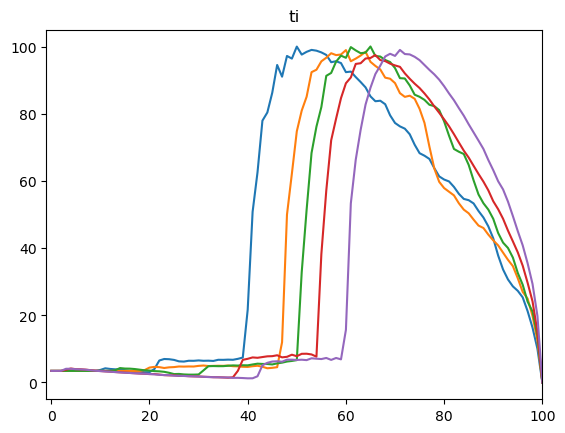

In [25]:
var = np.array([.5, .75, 1, 1.33, 2.])

Tvals = 592./11600*var
rhovals = 6.9*var
z_vals = [10, 11,12]

combi = serial_sim_tools.combinatorics([Tvals, rhovals, z_vals])
#for comb in combi:
#    print(comb)
sims = []


for entry in combi:
    base_name = 'johnrun1'
    [var1,var2,var3] = entry
    gen = sim(var1, var2, var3)
    name = f'{base_name}_{var1}_{var2}_{var3}'
    sims.append(name)


sims_arr = np.array(sims).reshape(5,15)


for i in range(15):
    seti = sims_arr[:, i]
    last2 = seti[0].split('_')[-1] +"_"+ seti[0].split('_')[-2]
    serial_sim_tools.plot_all(f'jonh_multirun_{last2}', seti)

I haven't found anything on the meanfree path 
Pressure seems to be defined by density and temperature

on mean free paths:
Rosseland mean absorption coefficient, including scattering, at node ir (1/cm)
Planck mean absorption coefficient, not including contributions of photoexcitations, at node ir (1/cm)

on internal energy:
Internal energy of element iz at node ir with no continuum lowering (erg/cm3).
